In [12]:
import numpy as nm
import pandas as pd 
import matplotlib.pyplot as mtp 
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv('/content/drive/MyDrive/dataset/alzheimer.csv')

In [15]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [16]:
df.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [20]:
df.Group=[1 if each=="Demented" else 0 for each in df.Group]

In [21]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,1,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [22]:
x= df.iloc[:,[2,9]].values
y=df.iloc[:,0].values

In [23]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [24]:
#feature scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [25]:
#fitting decision tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [26]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [27]:
#making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[39, 17],
       [24,  9]])

<ipython-input-32-efffc0577e11>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j,0],x_set[y_set == j,1],


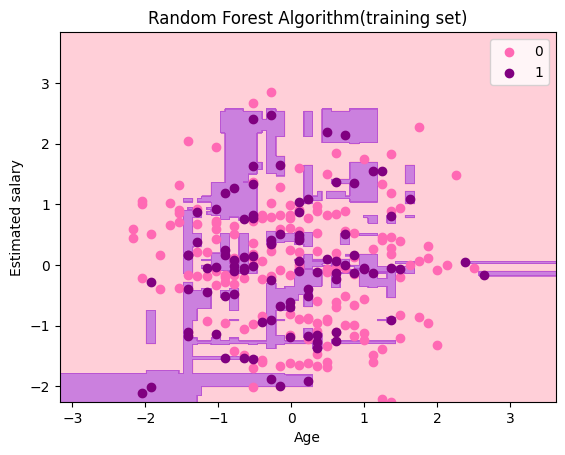

In [32]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01), nm.arange(start=x_set[:, 1].min(), stop=x_set[:, 1].max() + 1, step=0.01))
mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('pink','mediumorchid')))
mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())
for i,j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
              c=ListedColormap(('hotpink','purple'))(i),label=j)
mtp.title('Random Forest Algorithm(training set)')   
mtp.xlabel('Age')
mtp.ylabel('Estimated salary')
mtp.legend()
mtp.show()

<ipython-input-33-b7c793aeb80e>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j,0],x_set[y_set == j,1],


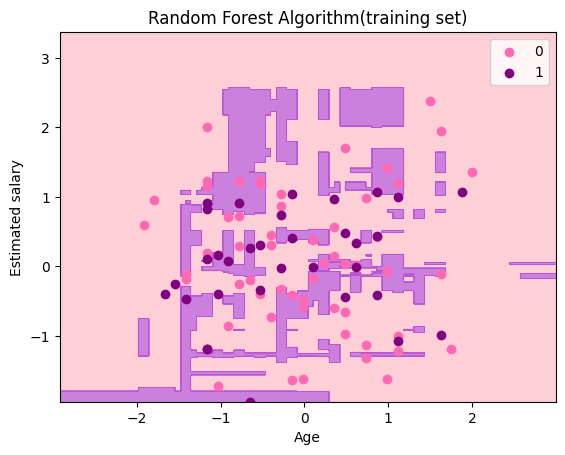

In [33]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01), nm.arange(start=x_set[:, 1].min(), stop=x_set[:, 1].max() + 1, step=0.01))
mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('pink','mediumorchid')))
mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())
for i,j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
              c=ListedColormap(('hotpink','purple'))(i),label=j)
mtp.title('Random Forest Algorithm(training set)')   
mtp.xlabel('Age')
mtp.ylabel('Estimated salary')
mtp.legend()
mtp.show() 